In [1]:
import numpy as np
import pandas as pd
import re

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [7]:
df = pd.read_csv('Hotel_Reviews.csv')

In [8]:
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [36]:
df.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

In [37]:
# Remove the columns
rev = df.drop(columns=['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date', 'Average_Score', 'Hotel_Name',
                       'Reviewer_Nationality', 'Total_Number_of_Reviews', 'Positive_Review', 'Review_Total_Positive_Word_Counts',
                       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags', 
                       'days_since_review', 'lat', 'lng'], axis=1)
# Print out the first rows of papers
rev.head()

,Negative_Review,Review_Total_Negative_Word_Counts
0,I am so angry that i made this post available...,397
1,No Negative,0
2,Rooms are nice but for elderly a bit difficul...,42
3,My room was dirty and I was afraid to walk ba...,210
4,You When I booked with your company on line y...,140


In [38]:
rev.shape

(515738, 2)

In [39]:
indexNames = rev[rev['Negative_Review'] == 'No Negative' ].index
 
# Delete these row indexes from dataFrame
rev.drop(indexNames , inplace=True)

In [40]:
rev.shape

(387848, 2)

In [41]:
# Remove punctuation
rev['Negative_Review'] = rev['Negative_Review'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
rev['Negative_Review'] = rev['Negative_Review'].map(lambda x: x.lower())
# Print out the first rows of papers
rev['Negative_Review'].head()

0     i am so angry that i made this post available...
2     rooms are nice but for elderly a bit difficul...
3     my room was dirty and i was afraid to walk ba...
4     you when i booked with your company on line y...
5     backyard of the hotel is total mess shouldn t...
Name: Negative_Review, dtype: object

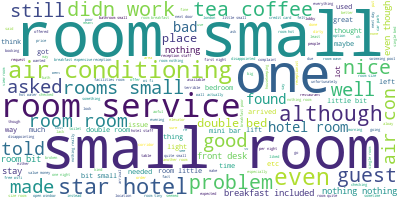

In [42]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed reviews together.
long_string = ','.join(list(rev['Negative_Review'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

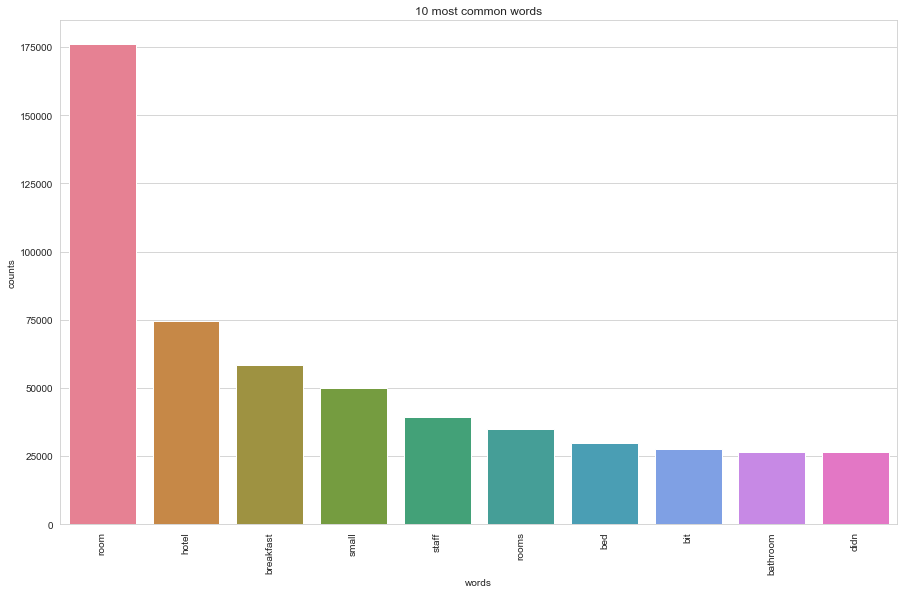

In [28]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(rev['Negative_Review'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [46]:
long_string[0:1000]

' i am so angry that i made this post available via all possible sites i use when planing my trips so no one will make the mistake of booking this place i made my booking via booking com we stayed for 6 nights in this hotel from 11 to 17 july upon arrival we were placed in a small room on the 2nd floor of the hotel it turned out that this was not the room we booked i had specially reserved the 2 level duplex room so that we would have a big windows and high ceilings the room itself was ok if you don t mind the broken window that can not be closed hello rain and a mini fridge that contained some sort of a bio weapon at least i guessed so by the smell of it i intimately asked to change the room and after explaining 2 times that i booked a duplex btw it costs the same as a simple double but got way more volume due to the high ceiling was offered a room but only the next day so i had to check out the next day before 11 o clock in order to get the room i waned to not the best way to begin y

In [47]:
from nltk import FreqDist
from nltk import word_tokenize

In [48]:
stri = word_tokenize(long_string)

In [50]:
freqdist = FreqDist(stri)
freqdist.most_common(50)

[('the', 531268),
 (',', 387841),
 ('was', 236750),
 ('a', 230251),
 ('to', 228892),
 ('and', 219473),
 ('room', 176026),
 ('in', 168040),
 ('not', 127445),
 ('i', 122298),
 ('of', 120631),
 ('for', 117655),
 ('it', 107124),
 ('we', 99303),
 ('is', 82191),
 ('very', 80597),
 ('but', 75665),
 ('hotel', 74709),
 ('t', 72474),
 ('no', 69992),
 ('on', 68744),
 ('were', 61672),
 ('at', 61162),
 ('had', 60151),
 ('that', 58901),
 ('breakfast', 58477),
 ('have', 54713),
 ('with', 51994),
 ('small', 49880),
 ('there', 46486),
 ('be', 45275),
 ('as', 44092),
 ('they', 42632),
 ('you', 40600),
 ('from', 40251),
 ('this', 39699),
 ('staff', 39512),
 ('so', 39272),
 ('my', 38794),
 ('nothing', 38768),
 ('rooms', 34802),
 ('our', 33993),
 ('would', 32291),
 ('could', 32079),
 ('when', 30932),
 ('bed', 29828),
 ('are', 29386),
 ('all', 29139),
 ('too', 28800),
 ('one', 28095)]

In [75]:
from nltk.corpus import stopwords
import string

# Get all the stop words in the English language
stopwords_list = stopwords.words('english')

# It is generally a good idea to also remove punctuation

# Now we have a list that includes all english stopwords, as well as all punctuation
stopwords_list += list(string.punctuation)
stopwords_list += ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


words_stopped = [word for word in stri if word not in stopwords_list]

In [76]:
freqdist = FreqDist(words_stopped)
freqdist.most_common(30)

[('room', 176026),
 ('hotel', 74709),
 ('breakfast', 58477),
 ('small', 49880),
 ('staff', 39512),
 ('nothing', 38768),
 ('rooms', 34802),
 ('would', 32291),
 ('could', 32079),
 ('bed', 29828),
 ('one', 28095),
 ('bit', 27546),
 ('bathroom', 26585),
 ('night', 24063),
 ('little', 22536),
 ('like', 22445),
 ('shower', 21290),
 ('good', 20821),
 ('us', 20225),
 ('get', 19504),
 ('service', 19323),
 ('bar', 19132),
 ('time', 17481),
 ('stay', 17430),
 ('reception', 16646),
 ('really', 16549),
 ('expensive', 16542),
 ('also', 16468),
 ('poor', 16104),
 ('even', 15417)]

In [77]:
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

# Lemmatize list of words and join
words_lemmatized = ' '.join([lemmatizer.lemmatize(w) for w in words_stopped])

In [78]:
words_lemmatized = word_tokenize(words_lemmatized)

In [80]:
freqdist = FreqDist(words_lemmatized)
freqdist.most_common(30)

[('room', 210828),
 ('hotel', 80413),
 ('breakfast', 59223),
 ('small', 49885),
 ('staff', 39979),
 ('nothing', 38789),
 ('bed', 37393),
 ('would', 32291),
 ('could', 32079),
 ('one', 28982),
 ('night', 28380),
 ('bathroom', 28063),
 ('bit', 27756),
 ('time', 23604),
 ('little', 22537),
 ('like', 22535),
 ('shower', 21949),
 ('u', 21208),
 ('good', 20878),
 ('day', 20785),
 ('service', 20608),
 ('get', 20079),
 ('bar', 19953),
 ('price', 18069),
 ('stay', 17755),
 ('reception', 16701),
 ('really', 16549),
 ('floor', 16542),
 ('expensive', 16542),
 ('also', 16468)]

In [81]:
total_word_count = sum(freqdist.values())
top_50_words = freqdist.most_common(50)
print('Word\t\t\tNormalized Frequency')
for word in top_50_words:
    normalized_frequency = word[1] / total_word_count
    print('{} \t\t\t {:.4}'.format(word[0], normalized_frequency))

Word			Normalized Frequency
room 			 0.04662
hotel 			 0.01778
breakfast 			 0.0131
small 			 0.01103
staff 			 0.008841
nothing 			 0.008578
bed 			 0.008269
would 			 0.007141
could 			 0.007094
one 			 0.006409
night 			 0.006276
bathroom 			 0.006206
bit 			 0.006138
time 			 0.00522
little 			 0.004984
like 			 0.004984
shower 			 0.004854
u 			 0.00469
good 			 0.004617
day 			 0.004597
service 			 0.004557
get 			 0.00444
bar 			 0.004413
price 			 0.003996
stay 			 0.003926
reception 			 0.003693
really 			 0.00366
floor 			 0.003658
expensive 			 0.003658
also 			 0.003642
poor 			 0.003562
door 			 0.003441
check 			 0.00341
even 			 0.00341
window 			 0.003385
need 			 0.003374
work 			 0.003193
water 			 0.003166
noisy 			 0.003081
air 			 0.002933
coffee 			 0.002857
wifi 			 0.002791
noise 			 0.002773
restaurant 			 0.002769
area 			 0.002753
hot 			 0.002688
better 			 0.002669
quite 			 0.002657
booking 			 0.002624
food 			 0.002577


In [84]:
import nltk
from nltk.collocations import *

bigram_measures = nltk.collocations.BigramAssocMeasures()
rev_finder = BigramCollocationFinder.from_words(words_lemmatized)
rev_scored = rev_finder.score_ngrams(bigram_measures.raw_freq)
rev_scored[:50]

[(('room', 'small'), 0.0029284260561363486),
 (('small', 'room'), 0.001880411324220463),
 (('room', 'service'), 0.0014354639427866665),
 (('air', 'conditioning'), 0.0012216149776542206),
 (('star', 'hotel'), 0.0011594727240841923),
 (('booking', 'com'), 0.0010144004168175073),
 (('tea', 'coffee'), 0.000886356413909869),
 (('room', 'room'), 0.0008306274178257156),
 (('room', 'bit'), 0.0008253198943891295),
 (('room', 'little'), 0.0007746772749317043),
 (('hotel', 'room'), 0.0007158522235095424),
 (('air', 'con'), 0.0007054583234462281),
 (('breakfast', 'included'), 0.0006826802020308796),
 (('double', 'bed'), 0.0006749400636858583),
 (('even', 'though'), 0.0006572483188972382),
 (('front', 'desk'), 0.0006459698315944928),
 (('nothing', 'nothing'), 0.000643979510305773),
 (('breakfast', 'room'), 0.0006296049676650192),
 (('could', 'better'), 0.0006178841867425583),
 (('little', 'bit'), 0.0006125766633059723),
 (('bit', 'small'), 0.0006108074888271103),
 (('mini', 'bar'), 0.00060616340582

In [103]:
from nltk import ngrams

n = 3
trigrams = list(ngrams(words_lemmatized, n))

#trigrams[0:100]

trigram_measures = nltk.collocations.TrigramAssocMeasures()
rev_trifinder = TrigramCollocationFinder.from_words(words_lemmatized)
rev_triscored = rev_trifinder.score_ngrams(trigram_measures.raw_freq)
rev_triscored[:50]

[(('room', 'bit', 'small'), 0.00034919081276539),
 (('room', 'little', 'small'), 0.0002726740165546079),
 (('room', 'quite', 'small'), 0.00023397332482950133),
 (('coffee', 'making', 'facility'), 0.00021849304813945872),
 (('making', 'facility', 'room'), 0.00020721456083671339),
 (('tea', 'coffee', 'making'), 0.0001974841012029723),
 (('room', 'small', 'room'), 0.00019615722034382579),
 (('tea', 'coffee', 'facility'), 0.00016033143714687002),
 (('two', 'single', 'bed'), 0.00015789882223843474),
 (('small', 'room', 'small'), 0.00015148556475255993),
 (('breakfast', 'included', 'price'), 0.00013224579229493554),
 (('room', 'room', 'small'), 0.00012715941566820724),
 (('tea', 'coffee', 'room'), 0.00012539024118934523),
 (('four', 'star', 'hotel'), 0.00012339991990062546),
 (('breakfast', 'could', 'better'), 0.00011853469008375494),
 (('air', 'conditioning', 'room'), 0.00011477519431617315),
 (('bed', 'pushed', 'together'), 0.00011389060707674214),
 (('front', 'desk', 'staff'), 0.000111236

In [105]:
n = 4
quadgrams = list(ngrams(words_lemmatized, n))

quadgram_measures = nltk.collocations.QuadgramAssocMeasures()
rev_quadfinder = QuadgramCollocationFinder.from_words(words_lemmatized)
rev_quadscored = rev_quadfinder.score_ngrams(quadgram_measures.raw_freq)
rev_quadscored[:50]

[(('tea', 'coffee', 'making', 'facility'), 0.00018045579684392542),
 (('coffee', 'making', 'facility', 'room'), 0.00013821675616109485),
 (('tea', 'coffee', 'facility', 'room'), 9.597771547826426e-05),
 (('single', 'bed', 'pushed', 'together'), 7.231500682348481e-05),
 (('tea', 'making', 'facility', 'room'), 6.0151932281308475e-05),
 (('room', 'little', 'bit', 'small'), 4.5113949210981354e-05),
 (('two', 'single', 'bed', 'pushed'), 4.135445344339957e-05),
 (('double', 'bed', 'two', 'single'), 3.472004914766702e-05),
 (('two', 'single', 'pushed', 'together'), 3.472004914766702e-05),
 (('room', 'little', 'small', 'side'), 3.317202147866276e-05),
 (('room', 'small', 'room', 'small'), 3.073940657022749e-05),
 (('coffee', 'tea', 'making', 'facility'), 2.8749085281507725e-05),
 (('bit', 'far', 'city', 'center'), 2.7422204422361216e-05),
 (('room', 'two', 'single', 'bed'), 2.5874176753356953e-05),
 (('breakfast', 'included', 'room', 'rate'), 2.543188313364145e-05),
 (('wall', 'thin', 'could',